In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import *
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
sns.set(rc = {'figure.figsize' : (15, 6)})
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
np.random.seed(100)

# Data Generation

In [2]:
base_dir = 'D:\Teletalk Intern(Image Recognition)\photo_for_test\photo'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(rotation_range = 10,    
                           zoom_range = [1.0, 1.0],       
                           width_shift_range= 0.02, 
                           height_shift_range= 0.05,
                           brightness_range=[0.9, 1.2],
                           fill_mode='nearest',
                           rescale = 1.0/255.
                           )

val_datagen = ImageDataGenerator(rescale = 1.0/255.)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 16,
                                                    color_mode = "rgb",
                                                    class_mode ='categorical',
                                                    target_size = (224,224),
                                                    )

validation_generator =  val_datagen.flow_from_directory(validation_dir,
                                                        batch_size= 8,
                                                        class_mode  = 'categorical',
                                                        target_size = (224,224),
                                                        shuffle = False)

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                   batch_size= 8,
                                                   class_mode  = 'categorical',
                                                   target_size = (224,224),
                                                   shuffle = False)

Found 719 images belonging to 4 classes.
Found 268 images belonging to 4 classes.
Found 91 images belonging to 4 classes.


# Basic Evaluation of Models

In [3]:
def model(path = ''):
    model = load_model(path)
    return model

def loss_accuracy(model):
    loss, accuracy = model.evaluate_generator(test_generator)
    return loss, accuracy

In [4]:
model1 = model(path = 'D:\Teletalk Intern(Image Recognition)\photo_for_test\plain_cnn_model.hdf5')
model2 = model(path = 'D:\Teletalk Intern(Image Recognition)\photo_for_test\VGG16.hdf5')
model3 = model(path = 'D:\Teletalk Intern(Image Recognition)\photo_for_test\Xception.hdf5')
model4 = model(path = 'D:\Teletalk Intern(Image Recognition)\photo_for_test\Inception.hdf5')
model5 = model(path = 'D:\Teletalk Intern(Image Recognition)\photo_for_test\ResNet50.hdf5')
model6 = model(path = 'D:\Teletalk Intern(Image Recognition)\photo_for_test\DenseNet121.hdf5')
model7 = model(path = 'D:\Teletalk Intern(Image Recognition)\photo_for_test\DenseNet169.hdf5')
model8 = model(path = 'D:\Teletalk Intern(Image Recognition)\photo_for_test\DenseNet201.hdf5')

loss1, accuracy1 = loss_accuracy(model = model1)
loss2, accuracy2 = loss_accuracy(model = model2)
loss3, accuracy3 = loss_accuracy(model = model3)
loss4, accuracy4 = loss_accuracy(model = model4)
loss5, accuracy5 = loss_accuracy(model = model5)
loss6, accuracy6 = loss_accuracy(model = model6)
loss7, accuracy7 = loss_accuracy(model = model7)
loss8, accuracy8 = loss_accuracy(model = model8)


evaluation_scores = {'Models Used':['Plain CNN Model', 'VGG16 Model', 'Xception Model', 'Inception Model', 'ResNet50 Model', 'DenseNet121 Model', 'DenseNet169 Model', 'DenseNet201 Model'],
                     'Loss':[loss1, loss2, loss3, loss4, loss5, loss6, loss7, loss8],
                     'Accuracy':[accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8]}

df = pd.DataFrame(evaluation_scores)
df

,Models Used,Loss,Accuracy
0,Plain CNN Model,0.443237,0.857143
1,VGG16 Model,0.488250,0.857143
2,Xception Model,0.237311,0.934066
3,Inception Model,0.250377,0.901099
4,ResNet50 Model,0.786668,0.549451
5,DenseNet121 Model,0.338496,0.912088
6,DenseNet169 Model,0.297247,0.868132
7,DenseNet201 Model,0.189872,0.923077


In [5]:
df.set_index('Models Used', inplace = True)

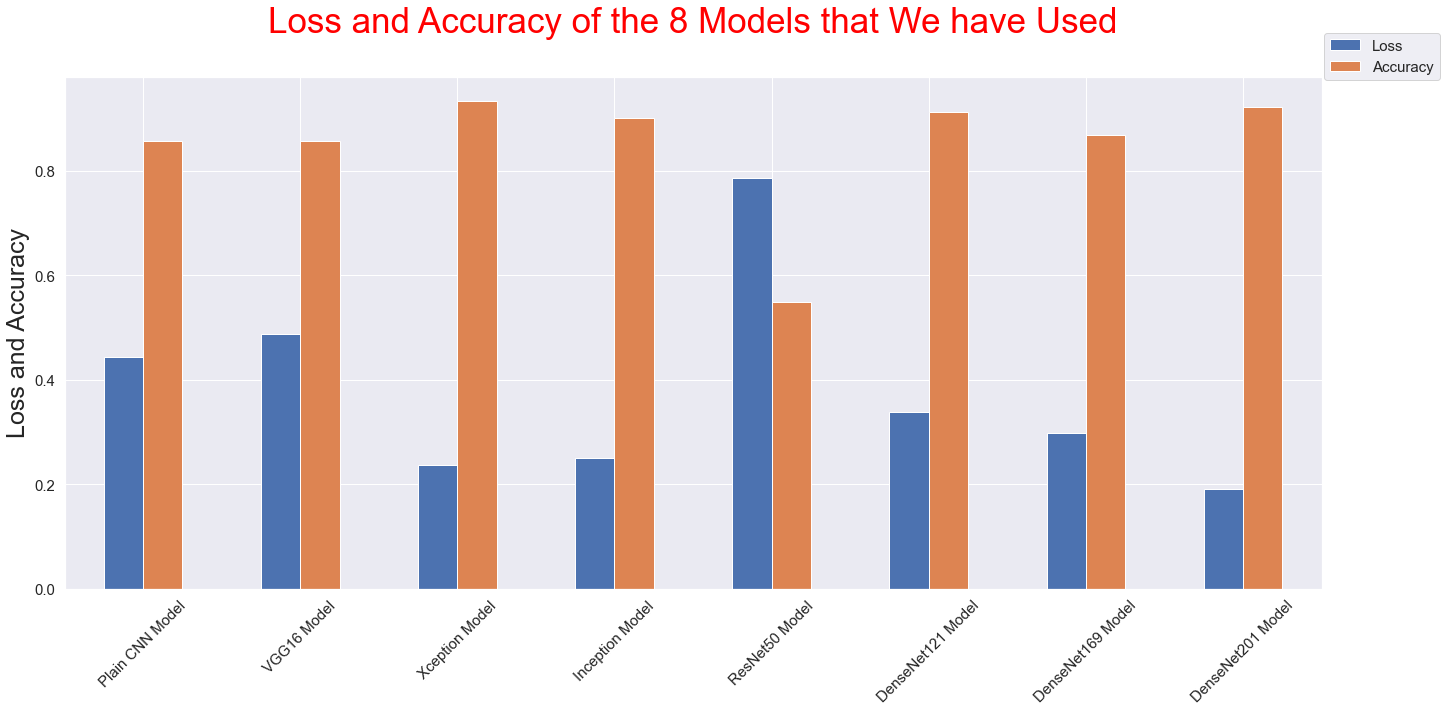

In [6]:
df.plot.bar(rot = 45, figsize = (20, 10));
plt.xlabel('')
plt.ylabel('Loss and Accuracy', fontsize = 25)
plt.title('Loss and Accuracy of the 8 Models that We have Used\n', fontsize = 35, color = 'red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

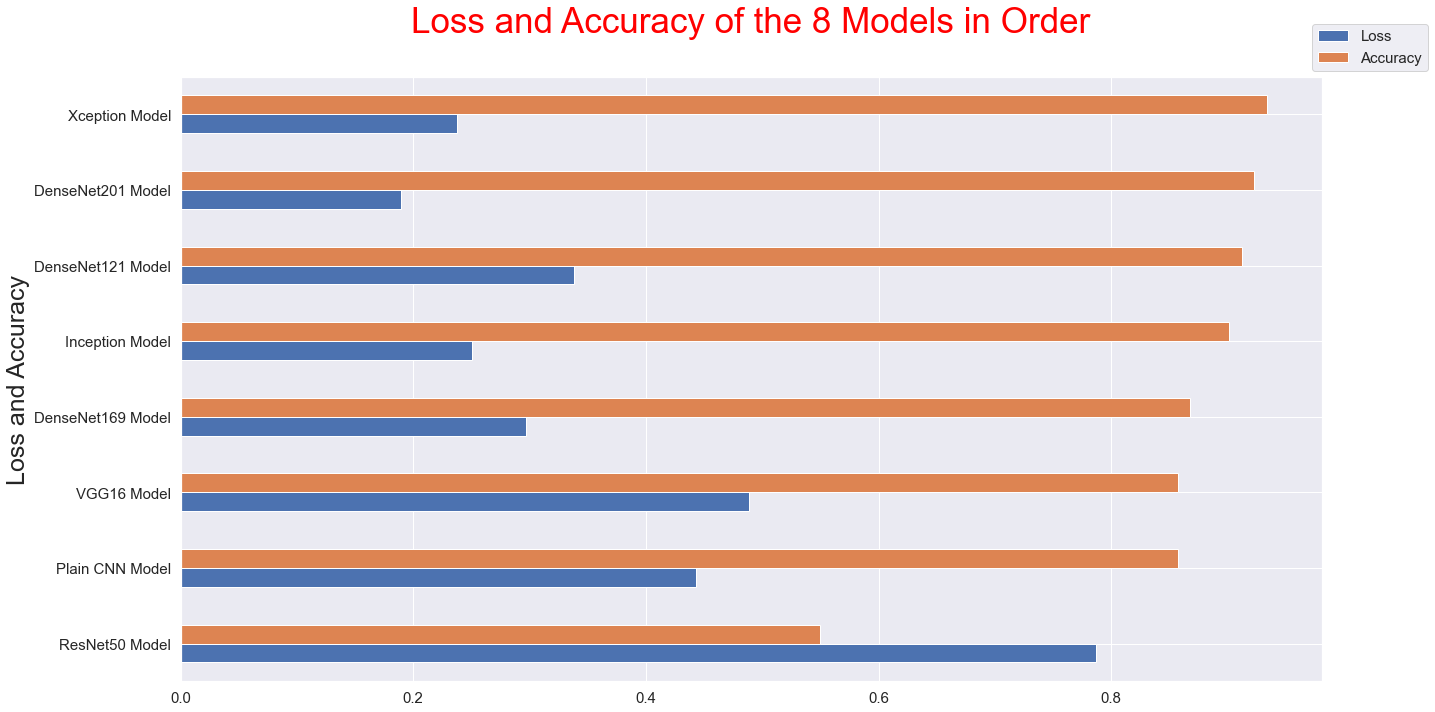

In [7]:
df.sort_values(by = ['Accuracy']).plot.barh(rot = 0, figsize = (20, 10));
plt.xlabel('')
plt.ylabel('Loss and Accuracy', fontsize = 25)
plt.title('Loss and Accuracy of the 8 Models in Order\n', fontsize = 35, color = 'red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

In [8]:
df.to_csv('D:\Teletalk Intern(Image Recognition)\photo_for_test\performance_data.csv', index = False)

# Model Performances

In [9]:
def performance(model, model_name = ''):
    predictions = model.predict_generator(test_generator)
    val_preds = np.argmax(predictions, axis = -1)
    val_trues = test_generator.classes

    cm = confusion_matrix(val_trues, val_preds)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    
    label_names = ['blurry_human', 'clear_human', 'not_aligned', 'not_human_or_blank']

    df_cm = pd.DataFrame(cm, index = label_names, columns = label_names)
    plt.figure(figsize = (20, 8))
    sns.heatmap(df_cm, annot = True, annot_kws = {"size": 20}) # font size
    plt.xticks(fontsize = 25)
    plt.yticks(rotation = 0, fontsize = 25)
    plt.title('\nConfusion Matrix for '+model_name+'\n', fontsize = 35, color = 'red')
    plt.show()
    
    print('-----------------------------------------------------------------------------------------------------------------')
    print('\nClassification Report for:--> '+model_name+'\n')
    print(classification_report(val_trues, val_preds, target_names = label_names))

### ***Plain (Custom) CNN Model***

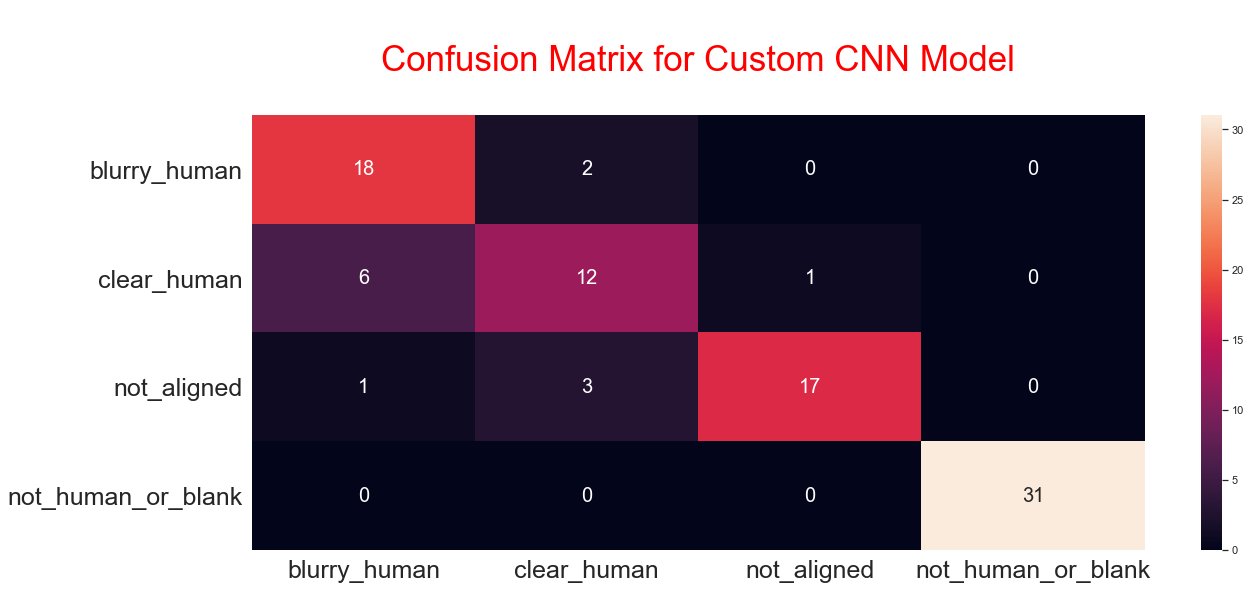

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Custom CNN Model

                    precision    recall  f1-score   support

      blurry_human       0.72      0.90      0.80        20
       clear_human       0.71      0.63      0.67        19
       not_aligned       0.94      0.81      0.87        21
not_human_or_blank       1.00      1.00      1.00        31

          accuracy                           0.86        91
         macro avg       0.84      0.84      0.83        91
      weighted avg       0.86      0.86      0.86        91



In [10]:
performance(model = model1, model_name = 'Custom CNN Model')

### ***VGG16 Model***

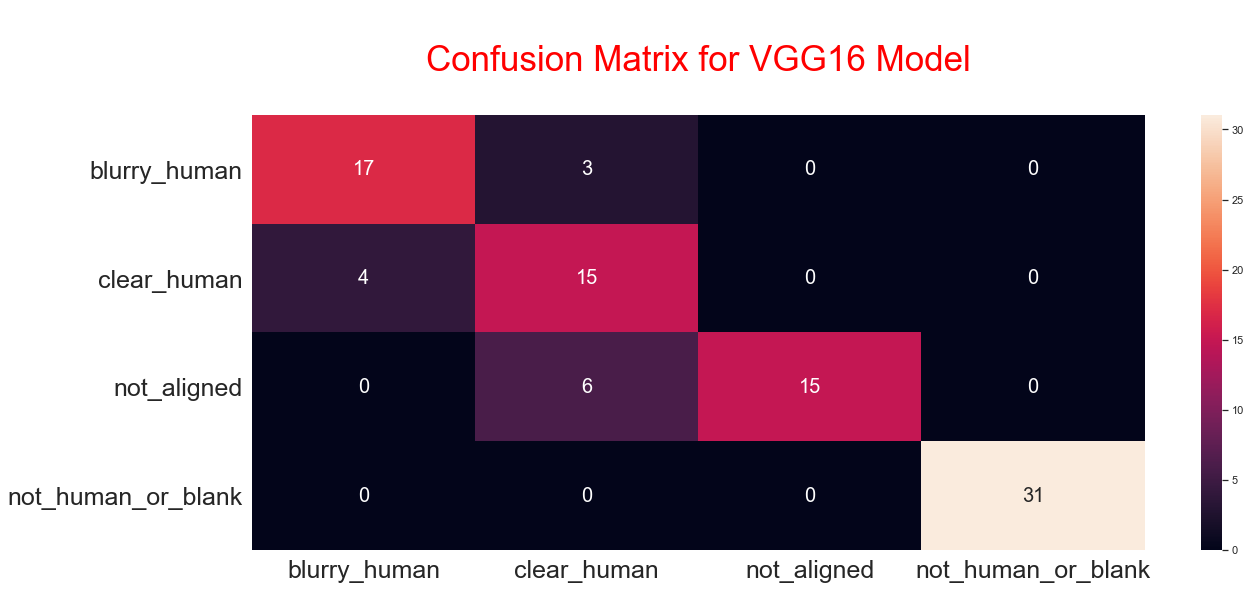

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> VGG16 Model

                    precision    recall  f1-score   support

      blurry_human       0.81      0.85      0.83        20
       clear_human       0.62      0.79      0.70        19
       not_aligned       1.00      0.71      0.83        21
not_human_or_blank       1.00      1.00      1.00        31

          accuracy                           0.86        91
         macro avg       0.86      0.84      0.84        91
      weighted avg       0.88      0.86      0.86        91



In [11]:
performance(model = model2, model_name = 'VGG16 Model')

### ***Xception Model***

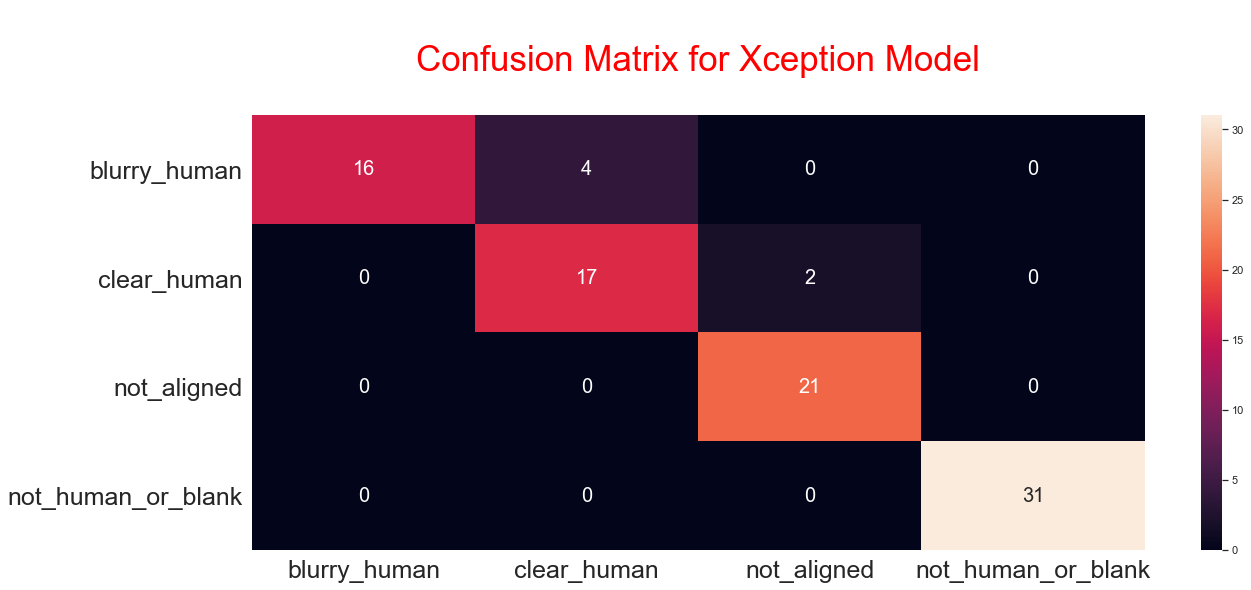

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Xception Model

                    precision    recall  f1-score   support

      blurry_human       1.00      0.80      0.89        20
       clear_human       0.81      0.89      0.85        19
       not_aligned       0.91      1.00      0.95        21
not_human_or_blank       1.00      1.00      1.00        31

          accuracy                           0.93        91
         macro avg       0.93      0.92      0.92        91
      weighted avg       0.94      0.93      0.93        91



In [12]:
performance(model = model3, model_name = 'Xception Model')

### ***Inception Model***

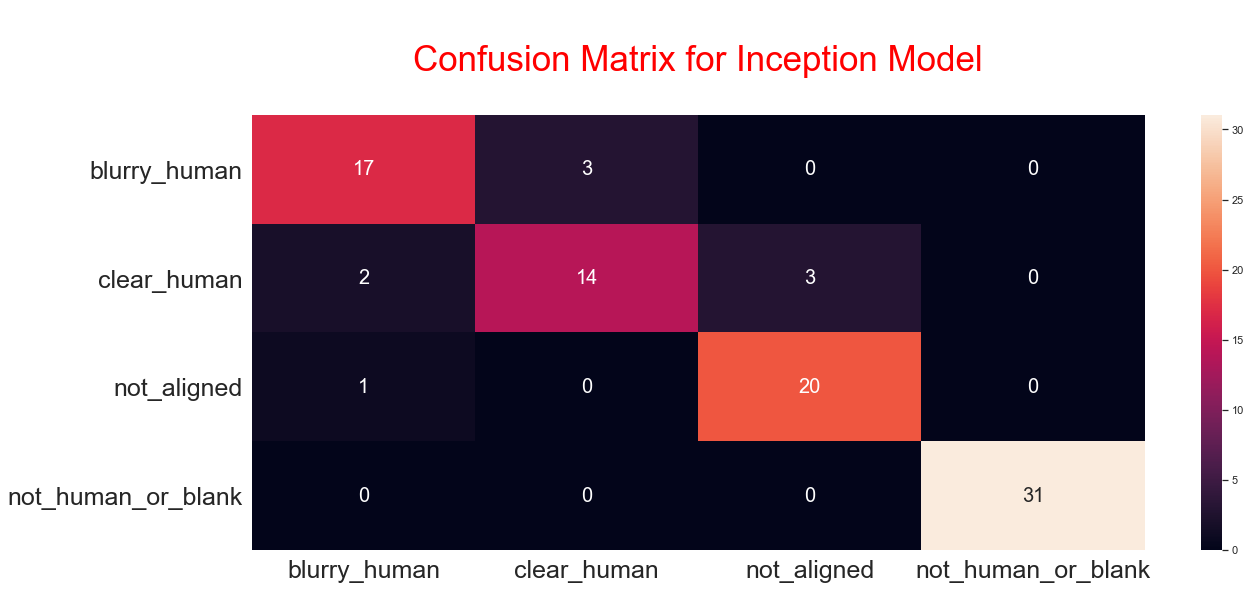

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Inception Model

                    precision    recall  f1-score   support

      blurry_human       0.85      0.85      0.85        20
       clear_human       0.82      0.74      0.78        19
       not_aligned       0.87      0.95      0.91        21
not_human_or_blank       1.00      1.00      1.00        31

          accuracy                           0.90        91
         macro avg       0.89      0.88      0.88        91
      weighted avg       0.90      0.90      0.90        91



In [13]:
performance(model = model4, model_name = 'Inception Model')

### ***ResNet50 Model***

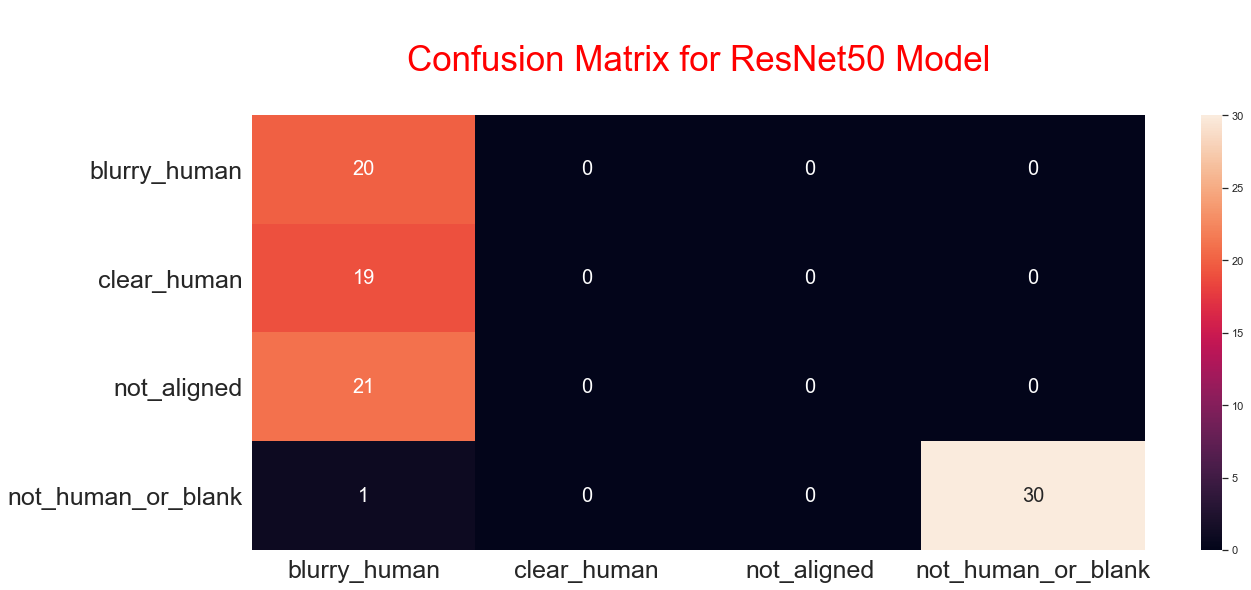

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> ResNet50 Model

                    precision    recall  f1-score   support

      blurry_human       0.33      1.00      0.49        20
       clear_human       0.00      0.00      0.00        19
       not_aligned       0.00      0.00      0.00        21
not_human_or_blank       1.00      0.97      0.98        31

          accuracy                           0.55        91
         macro avg       0.33      0.49      0.37        91
      weighted avg       0.41      0.55      0.44        91



In [14]:
performance(model = model5, model_name = 'ResNet50 Model')

### ***DenseNet121 Model***

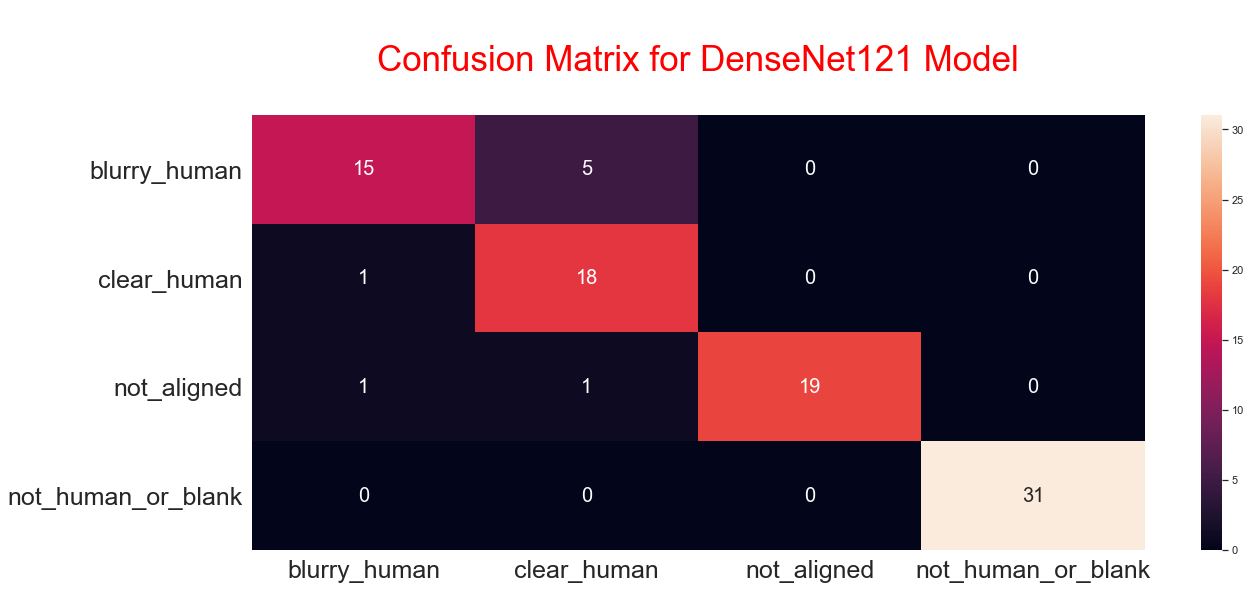

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> DenseNet121 Model

                    precision    recall  f1-score   support

      blurry_human       0.88      0.75      0.81        20
       clear_human       0.75      0.95      0.84        19
       not_aligned       1.00      0.90      0.95        21
not_human_or_blank       1.00      1.00      1.00        31

          accuracy                           0.91        91
         macro avg       0.91      0.90      0.90        91
      weighted avg       0.92      0.91      0.91        91



In [15]:
performance(model = model6, model_name = 'DenseNet121 Model')

### ***DenseNet169 Model***

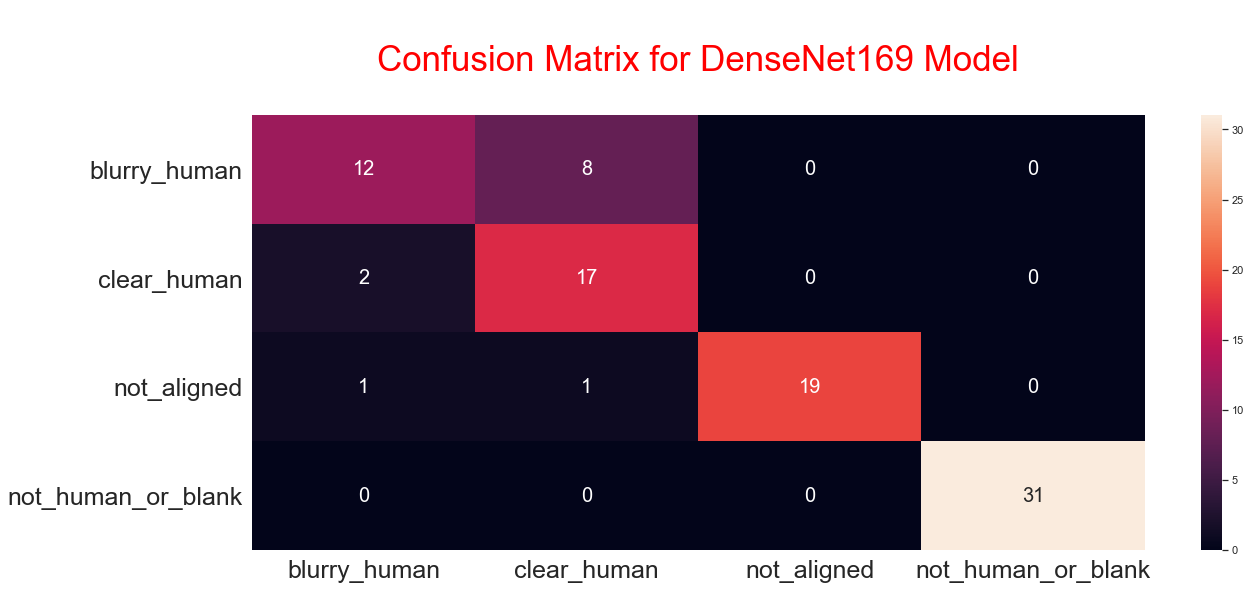

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> DenseNet169 Model

                    precision    recall  f1-score   support

      blurry_human       0.80      0.60      0.69        20
       clear_human       0.65      0.89      0.76        19
       not_aligned       1.00      0.90      0.95        21
not_human_or_blank       1.00      1.00      1.00        31

          accuracy                           0.87        91
         macro avg       0.86      0.85      0.85        91
      weighted avg       0.88      0.87      0.87        91



In [16]:
performance(model = model7, model_name = 'DenseNet169 Model')

### ***DenseNet201 Model***

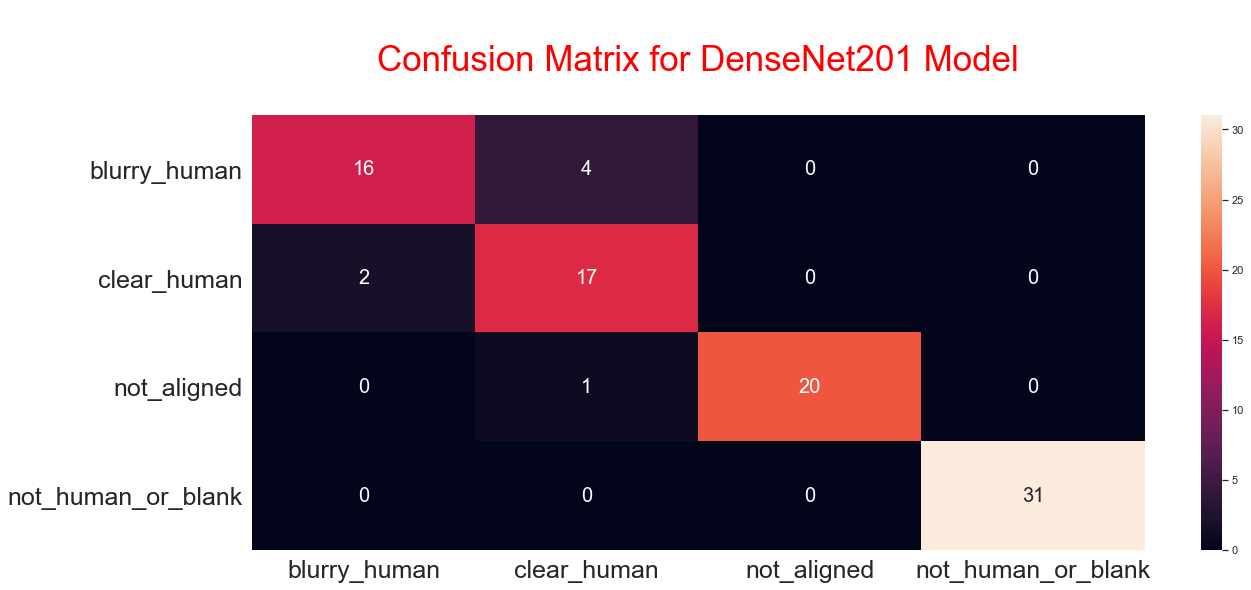

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> DenseNet201 Model

                    precision    recall  f1-score   support

      blurry_human       0.89      0.80      0.84        20
       clear_human       0.77      0.89      0.83        19
       not_aligned       1.00      0.95      0.98        21
not_human_or_blank       1.00      1.00      1.00        31

          accuracy                           0.92        91
         macro avg       0.92      0.91      0.91        91
      weighted avg       0.93      0.92      0.92        91



In [17]:
performance(model = model8, model_name = 'DenseNet201 Model')